## Absentisum Machine Learning Problem

In [72]:
#load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import os
import csv

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [73]:
#change working Directory
os.chdir('D:\Python Basics\Pycharm\Employee_Absentisum')

In [74]:
#Load Data
df = pd.read_excel('Absenteeism_at_work.xls')
df.shape
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [75]:
#Rename Column
df.rename(columns=({'Work load Average/day ': 'Work load Average per day'}), inplace=True)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [76]:
#Missing Value DataFrame
miss_value = pd.DataFrame({'Actual_value' : df.isnull().sum(),
                           'Miss_Percentage': (df.isnull().sum()/len(df)*100),
                           'Data_Types' : df.dtypes}).sort_values('Actual_value', ascending=True)
miss_value

,Actual_value,Miss_Percentage,Data_Types
ID,0,0.000000,int64
Day of the week,0,0.000000,int64
Seasons,0,0.000000,int64
Month of absence,1,0.135135,float64
Weight,1,0.135135,float64
Pet,2,0.270270,float64
Reason for absence,3,0.405405,float64
Distance from Residence to Work,3,0.405405,float64
Service time,3,0.405405,float64
Age,3,0.405405,float64


In [77]:
num = ['Distance from Residence to Work', 'Service time', 'Age','Work load Average per day','Transportation expense',
       'Hit target', 'Son', 'Pet', 'Weight', 'Height', 'Body mass index']

In [128]:
cat = list(set(df.columns) - set(num))
cat

['Education',
 'Absenteeism time in hours',
 'Social smoker',
 'Day of the week',
 'Reason for absence',
 'Social drinker',
 'ID',
 'Disciplinary failure',
 'Month of absence',
 'Seasons']

In [79]:
#Imputing missing value
#for var in cat:
#     df[var].fillna(df[var].mode(), inplace=True)

#Mean = 79.05
#median = 83

#df['Weight'].loc[70] #= np.nan


#Imputing Missing Values
from sklearn.impute import SimpleImputer
impute_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
impute_cat = impute_cat.fit(df[cat])
df[cat] = impute_cat.transform(df[cat])
impute_num = SimpleImputer(missing_values=np.nan, strategy='median')
impute_num = impute_num.fit(df[num])
df[num] = impute_num.transform(df[num])


In [80]:
#find out no of categories in column
for i in cat:
    print(i, ':', len(df[i].unique()), 'labels')

Education : 4 labels
Absenteeism time in hours : 19 labels
Social smoker : 2 labels
Day of the week : 5 labels
Reason for absence : 28 labels
Social drinker : 2 labels
ID : 36 labels
Disciplinary failure : 2 labels
Month of absence : 13 labels
Seasons : 4 labels


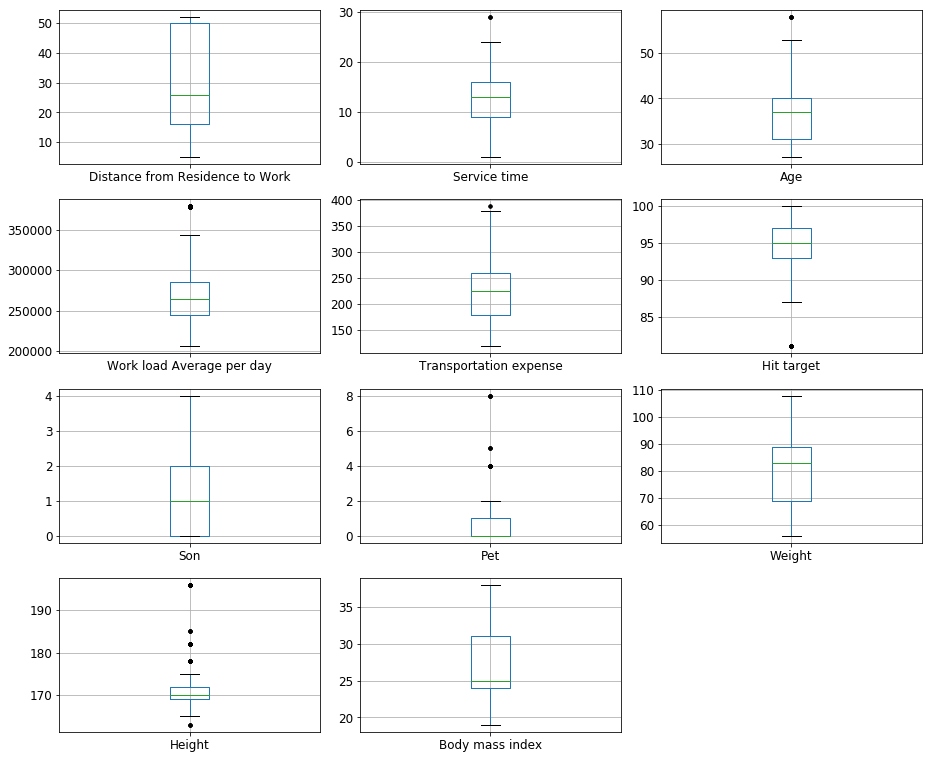

In [81]:
# Box Plot for Every Numerical Variable
fig = plt.figure(figsize=(13,13))
for i, var_name in enumerate(num):
    ax= fig.add_subplot(5,3, i+1)
    flierprops = dict(marker='.', markersize=6, markerfacecolor='black')
    df.boxplot(column=var_name, ax=ax, flierprops=flierprops, fontsize=12)
plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()

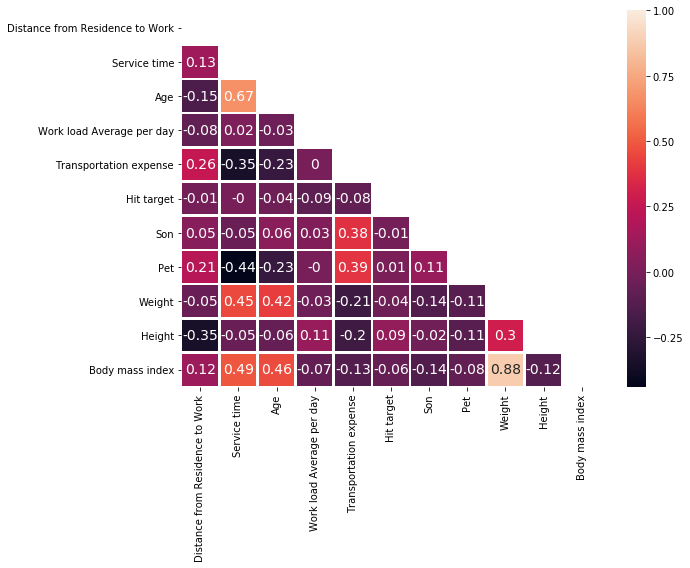

In [178]:
### Corelation Plot(HeatMap)
mask = np.zeros_like(df[num].corr())
traingle_indices = np.triu_indices_from(mask)
mask[traingle_indices] = True
plt.figure(figsize=(10,8))
sns.heatmap(round(df[num].corr(), 2), mask = mask, annot=True, annot_kws={'size': 14}, linewidths=1.6)
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

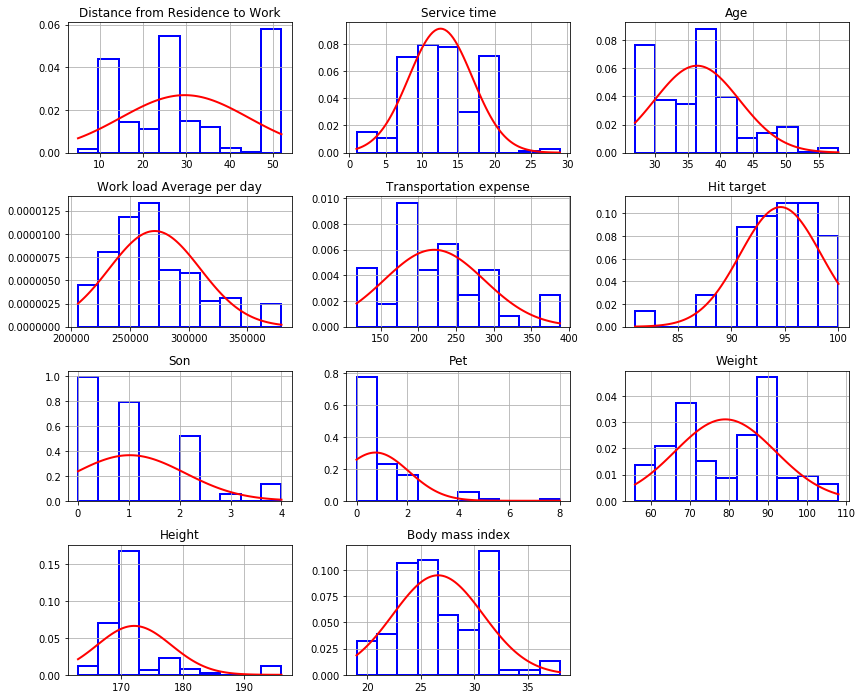

In [83]:
# Histogram plot for all numerical variable
fig = plt.figure(figsize=(12,12))
for i, var_name in enumerate(num):
    mu, std = norm.fit(df[var_name])
    ax = fig.add_subplot(5, 3, i+1)
    df[var_name].hist(density= True, color= 'w', edgecolor= 'b',linewidth = 2, ax= ax)
    xmin, xmax = min(df[var_name]), max(df[var_name])
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    ax.plot(x, p , 'r', linewidth = 2)
    ax.set_title(var_name, fontsize=12)
fig.tight_layout()
plt.savefig('hist_norms.png')
plt.show()


In [84]:
# Outlier removal
def outlier_removal(df, cols):
    for i in cols:
        print(i)
        q75, q25 = np.percentile(df.loc[:, i], [75, 25])
        IQR = q75 - q25
        min_value = q25 - (1.5 * IQR)
        max_value = q75 + (1.5 * IQR)
        print(q75,q25, IQR, min_value, max_value)
        df = df.drop(df[df.loc[:, i] < min_value].index)
        df = df.drop(df[df.loc[:, i] > max_value].index)
        print(df.shape[0])
    return df

In [85]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average per day          0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [142]:
cat_dummies = cat
cat_dummies.pop(1)
cat_dummies

df.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average per day', 'Hit target', 'Son',
       'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Education_1.0', 'Education_2.0',
       'Education_3.0', 'Education_4.0', 'Social smoker_0.0',
       'Social smoker_1.0', 'Day of the week_2.0', 'Day of the week_3.0',
       'Day of the week_4.0', 'Day of the week_5.0', 'Day of the week_6.0',
       'Reason for absence_0.0', 'Reason for absence_1.0',
       'Reason for absence_2.0', 'Reason for absence_3.0',
       'Reason for absence_4.0', 'Reason for absence_5.0',
       'Reason for absence_6.0', 'Reason for absence_7.0',
       'Reason for absence_8.0', 'Reason for absence_9.0',
       'Reason for absence_10.0', 'Reason for absence_11.0',
       'Reason for absence_12.0', 'Reason for absence_13.0',
       'Reason for absence_14.0', 'Reason for absence_15.0',
       'Reason for absence_16.0',

In [134]:
df = pd.get_dummies(columns=cat_dummies, data=df)

In [138]:
df.columns

Index(['ID', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average per day', 'Hit target', 'Son',
       'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'Education_1.0', 'Education_2.0',
       'Education_3.0', 'Education_4.0', 'Social smoker_0.0',
       'Social smoker_1.0', 'Day of the week_2.0', 'Day of the week_3.0',
       'Day of the week_4.0', 'Day of the week_5.0', 'Day of the week_6.0',
       'Reason for absence_0.0', 'Reason for absence_1.0',
       'Reason for absence_2.0', 'Reason for absence_3.0',
       'Reason for absence_4.0', 'Reason for absence_5.0',
       'Reason for absence_6.0', 'Reason for absence_7.0',
       'Reason for absence_8.0', 'Reason for absence_9.0',
       'Reason for absence_10.0', 'Reason for absence_11.0',
       'Reason for absence_12.0', 'Reason for absence_13.0',
       'Reason for absence_14.0', 'Reason for absence_15.0',
       'Reason for absence_16.0',

In [157]:
# X = df.iloc[:, 1:20].values
# y = df.iloc[:,20:].values.reshape(-1,1)
X = df.drop(['Absenteeism time in hours', 'ID'], axis=1).values
y = df['Absenteeism time in hours'].values.reshape(-1, 1)

In [158]:
# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)
# y_test = scalar.transform(y_train)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y,  test_size = 0.20, random_state=2)

In [160]:
#cross_check splitting
print(len(X_train)/len(df)*100)
print(len(X_test)/len(df)*100)
print(len(y_train)/len(df)*100)
print(len(y_test)/len(df)*100)

80.0
20.0
80.0
20.0


### Linear Regression

In [161]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
predict_LR_train = LR.predict(X_train)
predict_LR_test = LR.predict(X_test)

In [192]:
#print('Mean Squared Error of Linear Regression of training dataset is ', mean_squared_error(y_train, predict_LR_train))
print('Root Mean Squared Error of Linear Regression training dataset is ', np.sqrt(mean_squared_error(y_train, predict_LR_train)))
#print('Mean Squared Error of Linear Regression of testing dataset is ', mean_squared_error(y_test, predict_LR_test))
print('Root Mean Squared Error of Linear Regression testing dataset is ', np.sqrt(mean_squared_error(y_test, predict_LR_test)))

l_train = np.sqrt(mean_squared_error(y_train, predict_LR_train))
l_test = np.sqrt(mean_squared_error(y_test, predict_LR_test))

Root Mean Squared Error of Linear Regression training dataset is  0.8500601394833728
Root Mean Squared Error of Linear Regression testing dataset is  9424537775103.758


### Support Vector Regression

In [165]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
predict_svr_train = svr.predict(X_train)
predict_svr_test = svr.predict(X_test)

In [193]:
#print('Mean Squared Error of Support Vector Regression of training dataset is ', mean_squared_error(y_train, predict_svr_train))
print('Root Mean Squared Error of Support Vector Regression training dataset is ', np.sqrt(mean_squared_error(y_train, predict_svr_train)))
#print('Mean Squared Error of Support Vector Regression of testing dataset is ', mean_squared_error(y_test, predict_svr_test))
print('Root Mean Squared Error of Support Vector Regression testing dataset is ', np.sqrt(mean_squared_error(y_test, predict_svr_test)))


s_train = np.sqrt(mean_squared_error(y_train, predict_svr_train))
s_test = np.sqrt(mean_squared_error(y_test, predict_svr_test))

Root Mean Squared Error of Support Vector Regression training dataset is  0.946907850720563
Root Mean Squared Error of Support Vector Regression testing dataset is  0.9434541516812757


### Decision Tree Regression

In [167]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(min_impurity_decrease=0.01, random_state=0)
DTR.fit(X_train, y_train)
predict_DTR_train = DTR.predict(X_train)
predict_DTR_test = DTR.predict(X_test)

In [194]:
#print('Mean Squared Error of Decision Tree Regression of training dataset is ', mean_squared_error(y_train, predict_DTR_train))
print('Root Mean Squared Error of Decision Tree Regression training dataset is ', np.sqrt(mean_squared_error(y_train, predict_DTR_train)))
#print('Mean Squared Error of Decision Tree Regression of testing dataset is ', mean_squared_error(y_test, predict_DTR_test))
print('Root Mean Squared Error of Decision Tree Regression testing dataset is ', np.sqrt(mean_squared_error(y_test, predict_DTR_test)))

d_train = np.sqrt(mean_squared_error(y_train, predict_DTR_train))
d_test = np.sqrt(mean_squared_error(y_test, predict_DTR_test))

Root Mean Squared Error of Decision Tree Regression training dataset is  0.5296301398328538
Root Mean Squared Error of Decision Tree Regression testing dataset is  1.5309115767617631


### Random Forest Regression

In [169]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
RFR = RandomForestRegressor(n_estimators=500, random_state=0)
RFR.fit(X_train, y_train)
predict_RFR_train = RFR.predict(X_train)
predict_RFR_test = RFR.predict(X_test)

In [195]:
#print('Mean Squared Error of Random Forest Regression of training dataset is ', mean_squared_error(y_train, predict_RFR_train))
print('Root Mean Squared Error of Random Forest Regression training dataset is ', np.sqrt(mean_squared_error(y_train, predict_RFR_train)))
#print('Mean Squared Error of Random Forest Regression of testing dataset is ', mean_squared_error(y_test, predict_RFR_test))
print('Root Mean Squared Error of Random Forest Regression testing dataset is ', np.sqrt(mean_squared_error(y_test, predict_RFR_test)))


r_train = np.sqrt(mean_squared_error(y_train, predict_RFR_train))
r_test = np.sqrt(mean_squared_error(y_test, predict_RFR_test))

Root Mean Squared Error of Random Forest Regression training dataset is  0.3857693734462962
Root Mean Squared Error of Random Forest Regression testing dataset is  1.1206374098088414


### Gradient Boosting Regression

In [171]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(max_depth=2, random_state=0)
GBR.fit(X_train, y_train)
predict_GBR_train = GBR.predict(X_train)
predict_GBR_test = GBR.predict(X_test)

In [189]:
#print('Mean Squared Error of Gradient Boosting Regression of training dataset is ', mean_squared_error(y_train, predict_GBR_train))
print('Root Mean Squared Error of Gradient Boosting Regression training dataset is ', np.sqrt(mean_squared_error(y_train, predict_GBR_train)))
#print('Mean Squared Error of Gradient Boosting Regression of testing dataset is ', mean_squared_error(y_test, predict_GBR_test))
print('Root Mean Squared Error of Gradient Boosting Regression testing dataset is ', np.sqrt(mean_squared_error(y_test, predict_GBR_test)))

g_train = np.sqrt(mean_squared_error(y_train, predict_GBR_train))
g_test = np.sqrt(mean_squared_error(y_test, predict_GBR_test))

#RMSE_test > RMSE_train Overfitting
#RMSE_test < RMSE_train Underfitting

Root Mean Squared Error of Gradient Boosting Regression training dataset is  0.6245796207759879
Root Mean Squared Error of Gradient Boosting Regression testing dataset is  1.141054753572618


### Logistic Regression

In [173]:
from sklearn.linear_model import LogisticRegression
lor = GradientBoostingRegressor()
lor.fit(X_train, y_train)
predict_lor_train = lor.predict(X_train)
predict_lor_test = lor.predict(X_test)

In [198]:
#print('Mean Squared Error of Logistic Regression of training dataset is ', mean_squared_error(y_train, predict_lor_train))
#print('Root Mean Squared Error of Logistic Regression training dataset is ', np.sqrt(mean_squared_error(y_train, predict_lor_train)))
#print('Mean Squared Error of Logistic Regression of testing dataset is ', mean_squared_error(y_test, predict_lor_test))
#print('Root Mean Squared Error of Logistic Regression testing dataset is ', np.sqrt(mean_squared_error(y_test, predict_lor_test)))
lr_test = np.sqrt(mean_squared_error(y_test, predict_lor_test))
lr_train = np.sqrt(mean_squared_error(y_train, predict_lor_train))
#RMSE_test > RMSE_train Overfitting
#RMSE_test < RMSE_train Underfitting

In [201]:
model = pd.DataFrame({'Train_RMSE':[l_train, s_train, d_train, r_test, g_train, lr_train], 
              'Test_RMSE':[l_test, s_test, d_test, r_test, g_test, lr_test]},
             index=['Linear R', 'SVR', 'DT', 'RF', 'GBR', 'Logistic R']).reset_index()

In [205]:
model = model.rename(columns={'index' : 'Model Type'})

In [209]:
model.to_csv('Model_result.pdf', header=True, sep=',')